# Heart Disease Prediction

#### This notebook integrates clinical and Fitbit data to predict heart disease using multiple machine learning models.

In [1]:
pip install shap

  Using cached shap-0.44.1-cp38-cp38-win_amd64.whl.metadata (25 kB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached shap-0.44.1-cp38-cp38-win_amd64.whl (450 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.40.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


In [2]:
import shap


C:\Users\Rheal\Anaconda\lib\site-packages\numba\core\types\__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.
  long_ = _make_signed(np.long)


AttributeError: module 'numpy' has no attribute 'long'

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
import statsmodels

In [ ]:
pip uninstall numpy


In [ ]:
pip install numpy==1.24.4

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4



  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.40.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

AttributeError: module 'numpy' has no attribute 'MachAr'

### Load datasets

In [19]:
heart_df = pd.read_csv("heart.csv")

In [20]:
personal_df = pd.read_csv("personal_health_data.csv")

In [21]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [22]:
heart_df.head ()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              10000 non-null  object 
 1   Age                  10000 non-null  int64  
 2   Gender               10000 non-null  object 
 3   Weight               10000 non-null  float64
 4   Height               10000 non-null  float64
 5   Medical_Conditions   6696 non-null   object 
 6   Medication           10000 non-null  object 
 7   Smoker               10000 non-null  object 
 8   Alcohol_Consumption  6640 non-null   object 
 9   Timestamp            10000 non-null  object 
 10  Day_of_Week          10000 non-null  object 
 11  Sleep_Duration       10000 non-null  float64
 12  Deep_Sleep_Duration  10000 non-null  float64
 13  REM_Sleep_Duration   10000 non-null  float64
 14  Wakeups              10000 non-null  int64  
 15  Snoring              10000 non-null  

###   Balancing Data Size

In [24]:
personal_sample = personal_df.sample(n=918, random_state=42).reset_index(drop=True)
heart_df_reset = heart_df.reset_index(drop=True)

#### This line randomly selects 918 rows from the personal_df DataFrame.

#### The number 918  matches the number of rows in the clinical dataset heart_df, allowing a one-to-one merge.

#### random_state=42 ensures reproducibility – the same sample is selected every time you run the code.

#### .reset_index(drop=True) removes the old row indices and assigns new ones from 0 to 917. This ensures clean alignment when merging.

#### This is necessary because the personal_df dataset  has more rows than heart_df. For clean merging (especially with pd.concat()), both DataFrames must have the same row count and matching indices.Without .reset_index(drop=True), the merge might misalign or retain old indices, causing data integrity issues.

### Drop overlapping columns before merging

In [25]:
overlap_cols = set(personal_sample.columns) & set(heart_df.columns)
personal_clean = personal_sample.drop(columns=overlap_cols, errors='ignore')


#### This code was used to clean the personal dataset before merging, ensuring that:There are no conflicting or duplicate column names. The merged dataset will have clear, non-redundant columns from both sources. The final merged DataFrame will be safe and ready for further analysis and modeling.



### Merge datasets

In [26]:
df_merged = pd.concat([personal_clean, heart_df_reset], axis=1)
df = df_merged.drop(columns=['User_ID', 'Timestamp'], errors='ignore')

In [27]:
df.head ()

,Gender,Weight,Height,Medical_Conditions,Medication,Smoker,Alcohol_Consumption,Day_of_Week,Sleep_Duration,Deep_Sleep_Duration,...,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Female,69.113400,156.100901,Hypertension,Yes,No,Heavy,Saturday,8.055691,7.041460,...,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,Female,120.226559,173.854811,Diabetes,No,No,Moderate,Thursday,9.041889,1.023386,...,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,Male,38.567225,196.241620,NaN,No,No,Moderate,Sunday,7.073892,6.607136,...,ATA,130,283,0,ST,98,N,0.0,Up,0
3,Female,54.581935,148.512053,Hypertension,No,No,NaN,Saturday,7.445248,1.468288,...,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,Male,85.213526,164.471702,NaN,Yes,Yes,Moderate,Thursday,8.660989,6.277896,...,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### - pd.concat is a Panda function that was used to combine the two data frame. The axis = 1 indicades that the concatenation is done horizontal ie colum wise the new dataframe is then stored in a new dataframe called df_merge


#### - This code removes the unnecessary or irrelevant columns from the dataset before analysis as they were deemed to not be useful for modeling and have no predictive value. This helped simplify the dataset which can prevent over fitting

### Plot of  Target variable distribution

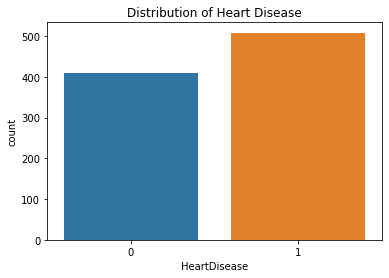

In [28]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribution of Heart Disease")
plt.show()


#### This is an example of moderate class imbalance. This is important as Most machine learning models (e.g., Random Forest, Logistic Regression) can still perform reasonably well. However, metrics like accuracy alone could be misleading, especially if the difference grows.We intend to track metrics like F1-score, recall, and ROC-AUC, for both classes.



### Identify and remove multicollinear features from a dataset using Variance Inflation Factor (VIF),

In [29]:
pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.40.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


AttributeError: module 'numpy' has no attribute 'MachAr'

#### This code imports the variance_inflation_factor (VIF) function from the statsmodels library.

#### Variance Inflation Factor (VIF) is a diagnostic tool for multicollinearity in regression analysis.

#### Multicollinearity occurs when independent variables in a regression model are highly correlateda as this can inflate the variance of coefficient estimates, make them unstable and lead to misleading results.

#### It is useful because it helps detect redundant variables before running a regression model. Which Improves model stability, interpretability, and predictive performance.





In [31]:
X = df.drop(columns='HeartDisease')
numeric_df = X.select_dtypes(include=['int64', 'float64'])

###  Standardize for VIF

In [32]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(numeric_df), columns=numeric_df.columns)


### Clean NaN/inf before VIF

In [33]:
scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_df.dropna(inplace=True)

### Calculate VIF

#### This was done manualy as we were having some issues with statsmodels.stats.outliers_influence import variance_inflation_factor


In [34]:
def calculate_vif_manual(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_values = []

    for i in range(X.shape[1]):
        y = X.iloc[:, i]
        X_others = X.drop(X.columns[i], axis=1)

        model = LinearRegression()
        model.fit(X_others, y)
        r_squared = model.score(X_others, y)

        if r_squared == 1:
            vif = np.inf
        else:
            vif = 1 / (1 - r_squared)

        vif_values.append(vif)

    vif_data["VIF"] = vif_values
    return vif_data


### Iteratively Remove Features with High VIF 

In [35]:
def remove_high_vif_features_manual(dataframe, threshold=10.0):
    dropped = []
    while True:
        vif_df = calculate_vif_manual(dataframe)
        max_vif = vif_df['VIF'].max()
        if max_vif > threshold:
            worst_feature = vif_df.sort_values(by='VIF', ascending=False)['Feature'].iloc[0]
            dataframe = dataframe.drop(columns=[worst_feature])
            dropped.append(worst_feature)
        else:
            break
    return dataframe, dropped, vif_df

### Apply VIF Filter to Your Data 

In [36]:
scaled_df_final, dropped_features, final_vif_table = remove_high_vif_features_manual(scaled_df)


### Display results

In [37]:
print("Dropped features due to high VIF:", dropped_features)
print("\nFinal VIF values:\n", final_vif_table)

Dropped features due to high VIF: ['Sleep_Duration', 'Health_Score']

Final VIF values:
                 Feature       VIF
0                Weight  1.018748
1                Height  1.014786
2   Deep_Sleep_Duration  1.873680
3    REM_Sleep_Duration  1.889927
4               Wakeups  1.014663
5            Heart_Rate  1.024983
6    Blood_Oxygen_Level  1.116236
7       Calories_Intake  1.009371
8          Water_Intake  1.023378
9      Skin_Temperature  1.016671
10  Body_Fat_Percentage  1.028138
11          Muscle_Mass  1.020012
12         Anomaly_Flag  1.132213
13                  Age  1.329094
14            RestingBP  1.116227
15          Cholesterol  1.166070
16            FastingBS  1.123748
17                MaxHR  1.267919
18              Oldpeak  1.109622


### Redefine X from cleaned df and drop multicollinear features

In [38]:
X = df.drop(columns='HeartDisease').drop(columns=dropped_features, errors='ignore')
y = df['HeartDisease']


#### df.drop(columns='HeartDisease'):Removes the target variable (HeartDisease) from the dataset  because you don’t want to include the label as a predictor.

#### .drop(columns=dropped_features, errors='ignore'): Further removes any features that were flagged earlier for high multicollinearity using VIF.

#### Thereby creating a clean, final feature set (X) for model training, with no target column and no multicollinear features.



### Encode categorical features

In [39]:
categorical_cols = X.select_dtypes(include='object').columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le


#### This code transforms every categorical column in X into numeric codes using LabelEncoder. This is then Stored in each encoder so it can be reused later (e.g., for test data). The finally prepares the feature matrix X for modeling.¶

### Final scale

In [40]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#### - This line creates an instance of the standard scaler class from sklearn.preprocessing. this was done to standardize the dataset features and scaling to unit variance ie z score. StandardScaler helps put all numerical features on the same scale so that the model doesn't give more importance to features with larger values just because of their scale.

#### This code created a new, standardized version of the dataset X, stored as a DataFrame named X_scaled, with all features on the same scale (zero mean, unit variance).

### Train/test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [42]:
logreg = LogisticRegression(max_iter=1000)
params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
grid = GridSearchCV(logreg, param_grid=params, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)


In [43]:

print("Best Parameters:", grid.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        98
           1       0.89      0.83      0.85       132

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230

Confusion Matrix:
 [[ 84  14]
 [ 23 109]]


### Hyperparameter search space for tuning a Random Forest model using GridSearchCV in scikit-learn.

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


#### This code controls the number of trees in the forest. More trees often improve performance, but increase training time. GridSearch will test forests with 50, 100, and 200 trees.

#### max_depth : limits how deep each tree in the forest can grow. GridSearch will try:Max depth of 5,10

#### Minimum number of samples required to split an internal node. Higher values make the tree more conservative and help prevent overfitting.GridSearch will try splits requiring: At least 2, 5, 10 samples.


In [45]:

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
cv=5, scoring='f1', n_jobs=-1)

#### This code will :Automatically train multiple Random Forest models, evaluate them with 5-fold cross-validation, use F1-score to choose the best hyperparameter combination and Return the best model configuration for use in predictions.



In [46]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [47]:
print("Best Parameters (RF):", grid_search.best_params_)
print("Classification Report (RF):")
print(classification_report(y_test, y_pred_best_rf))

Best Parameters (RF): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report (RF):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        98
           1       0.91      0.89      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



### Feature Importance

In [48]:
importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]


#### importances = best_rf.feature_importances_:Extracts the feature importance scores from the trained RandomForestClassifier stored in best_rf. These values indicate how important each feature was in making predictions.The higher the score, the more influential the feature.

#### feature_names = X.columns: Gets the column names (i.e., feature names) from the feature set X. This is used to label the importances for visualization or reporting.

#### indices = np.argsort(importances)[::-1]  returns the indices that would sort the feature importances in ascending order.

#### [::-1] reverses the order to get descending order — from most to least important.

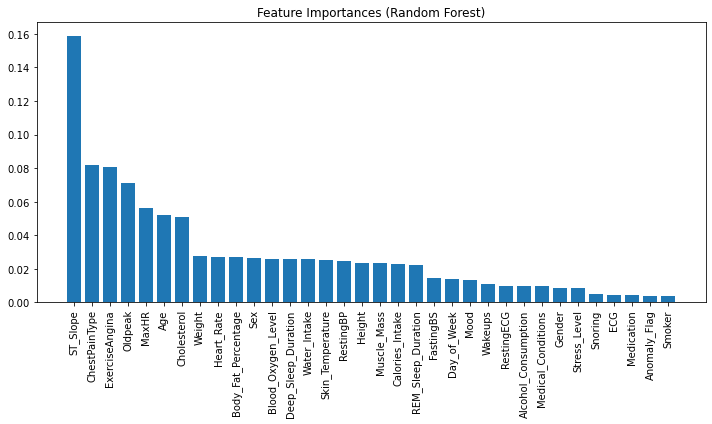

In [49]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [50]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True),
    'Naive Bayes': GaussianNB()
}


In [51]:
results = []

In [52]:
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
        else:
            auc = 'N/A'

        results.append({
            'Model': name,
            'Accuracy': round(acc, 4),
            'AUC': round(auc, 4) if auc != 'N/A' else 'N/A'
        })
    except Exception as e:
        print(f"{name} failed: {e}")

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df)


Logistic Regression failed: name 'accuracy_score' is not defined
Random Forest failed: name 'accuracy_score' is not defined
SVM (RBF Kernel) failed: name 'accuracy_score' is not defined
Naive Bayes failed: name 'accuracy_score' is not defined


KeyError: 'Accuracy'

### Top Feature Importance

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.barh(feature_names[indices][:10], importances[indices][:10])
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### ROC Curve Display

In [ ]:
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.show()

#### The blue curve shows how well the classifier distinguishes between the two classes (e.g., "Heart Disease" vs. "No Heart Disease") across all thresholds.

#### The closer the curve is to the top-left corner, the better the model is.

#### AUC = 0.94 (Excellent) the model has excellent discriminative power.

#### The model performs very well at distinguishing between the presence and absence of heart disease which makes it suitable for medical risk prediction, where both sensitivity and specificity matter.




In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Multi-Class 

#### To expand the current binary heart disease labels (0 = no disease, 1 = disease) into multi-class labels (e.g  types or severity of heart disease),we engineer a new target column using the clinical features already in the merge dataset such as chest pain type.This allowed us to model and predict subtypes or stages of heart disease rather than just a yes/no diagnosis.

#### The chest pain type in data set were as follows:

#### 'aat' → typical_angina

#### 'atp' → atypical_angina

#### 'nap' → non_anginal_pain

#### 'asy' → asymptomatic

#### These chest pain types are clinically meaningful indicators of cardiovascular risk:typical_angina and asymptomatic are more closely associated with positive heart disease diagnoses. Whereas non_anginal_pain often indicates non-cardiac causes of discomfort.


### Define the mapping 

In [53]:
cp_mapping = {
    'aat': 'typical_angina',
    'nap': 'non_anginal_pain',
    'atp': 'atypical_angina',
    'asy': 'asymptomatic'
}


#### Replace abbreviations in the dataset

In [54]:
df['ChestPainType'] = df['ChestPainType'].replace(cp_mapping)

#### Create and fit encoder

In [55]:
cp_encoder = LabelEncoder()
df['ChestPainEncoded'] = cp_encoder.fit_transform(df['ChestPainType'])


#### Print what each label maps to

In [56]:
print("Chest Pain Type Mapping:")
for i, label in enumerate(cp_encoder.classes_):
    print(f"{i}: {label}")

Chest Pain Type Mapping:
0: ASY
1: ATA
2: NAP
3: TA


In [57]:
def assign_heart_disease_type(row):
    if row['HeartDisease'] == 0:
        return 0  # No disease
    elif row['HeartDisease'] == 1:
        if row['ChestPainType'] == 'ATA':  # Atypical Angina
            return 1  # Mild
        elif row['ChestPainType'] == 'NAP':  # Non-anginal Pain
            return 2  # Moderate
        elif row['ChestPainType'] in ['ASY', 'TA']:  # Asymptomatic or Typical Angina
            return 3  # Severe
    return 0  # Fallback

### Create new multi-class target

In [58]:
df['HeartDiseaseType'] = df.apply(assign_heart_disease_type, axis=1)

### Check distribution

In [59]:
print(df['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']


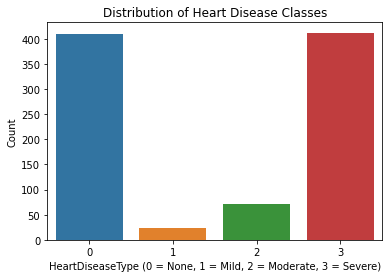

In [60]:
sns.countplot(data=df, x='HeartDiseaseType')
plt.title("Distribution of Heart Disease Classes")
plt.xlabel("HeartDiseaseType (0 = None, 1 = Mild, 2 = Moderate, 3 = Severe)")
plt.ylabel("Count")
plt.show()

### Define Feature Set and Target

In [61]:
X = df.drop(columns=['HeartDisease', 'HeartDiseaseType'])  # predictors
y = df['HeartDiseaseType']  # multi-class target

### Train-Test Split

In [62]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [63]:
scaler = StandardScaler()


In [64]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)


Index(['Gender', 'Medical_Conditions', 'Medication', 'Smoker',
       'Alcohol_Consumption', 'Day_of_Week', 'Snoring', 'ECG', 'Stress_Level',
       'Mood', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina',
       'ST_Slope'],
      dtype='object')


In [65]:
X_encoded = X.copy()
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    encoders[col] = le

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, stratify=y, test_size=0.2, random_state=42)

In [67]:
scaler = StandardScaler()


In [68]:
X_train_scaled = scaler.fit_transform(X_train)


In [69]:
X_test_scaled = scaler.transform(X_test)

In [70]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Support Vector Machine": SVC(probability=True)
}

In [71]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f" {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

 Random Forest


C:\Users\Rheal\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rheal\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rheal\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rheal\Anaconda\lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        82
           1       0.00      0.00      0.00         5
           2       1.00      0.43      0.60        14
           3       0.87      0.89      0.88        83

    accuracy                           0.82       184
   macro avg       0.66      0.55      0.57       184
weighted avg       0.81      0.82      0.80       184

--------------------------------------------------
 Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        82
           1       0.00      0.00      0.00         5
           2       0.71      0.36      0.48        14
           3       0.80      0.87      0.83        83

    accuracy                           0.78       184
   macro avg       0.57      0.51      0.52       184
weighted avg       0.75      0.78      0.76       184

--------------------------------------------------
 Suppor

C:\Users\Rheal\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rheal\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rheal\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Check Class Distribution

In [72]:
print("y_test class counts:\n", y_test.value_counts())
print("y_pred class counts:\n", pd.Series(y_pred).value_counts())

y_test class counts:
 HeartDiseaseType
3    83
0    82
2    14
1     5
Name: count, dtype: int64
y_pred class counts:
 0    94
3    85
2     5
Name: count, dtype: int64


### Applying SMOTE (Synthetic Minority Oversampling Technique):

In [73]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "2"

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

C:\Users\Rheal\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Rheal\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Rheal\Anaconda\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Rheal\Anaconda\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Rheal\Anaconda\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


AttributeError: 'NoneType' object has no attribute 'split'